# **AP155 Lab Assignment**
## Module 5: Partial Differential Equations

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.



### Student Information

_Full Name (Last Name, First Name)_: \
_Student No._:\
_Section_:

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:**

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Problem 1 - []/100

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

### PROBLEM 1
**The Schrodinger equation and the Crank-Nicolson method**

_Refer to Exercise 9.8 in the Newman text._ In this problem, you will use the Crank-Nicolson method to solve the full time-dependent Schrodinger equation and hence develop a picture of how a wavefunction evolves over time.

Consider an electron (mass $M = 9.109 \times 10^{-31}$ kg) in a box of length $L = 10^{-8}$ m. Suppose that at time $t = 0$ the wavefunction of the electron has the form

$$ \psi(x,0) = \exp\left[-\frac{(x-x_0)^2}{2\sigma^2}\right]e^{i\kappa x},$$
where $x_0 = \frac{L}{2}$, $\sigma = 1 \times 10^{-10}$ m, $\kappa = 5 \times 10^{10} {\rm m}^{-1}$,  and $\psi = 0$ on the walls at $x = 0$ and $x = L$.

1. Perform a single step of the Crank-Nicolson method for this electron, calculating the vector $\psi(t)$ of values of the wavefunction, given the initial wavefunction above and using $N = 1000$ spatial slices with $a = L/N$. Your program will have to perform the following steps. First, given the vector $\psi(0)$ at $t = 0$, you will have to multiply by the matrix $\bf{B}$ to get a vector $\bf{v} = \bf{B}\psi$. Because of the tridiagonal form of $\bf{B}$, this is fairly simple. The $i$th component of $\bf{v}$ is given by
$$ v_i = b_1\psi_i + b_2(\psi_{i+1} + \psi_{i-1}).$$

   You will also have to choose a value for the time-step $h$. A reasonable choice is $h = 10^{-18}$ s. *(30 pts.)*

2. Second you will have to solve the linear system ${\bf Ax}= {\bf v}$ for $\bf{x}$, which gives you the new value of $\psi$. You could do this using a standard linear equation solver like the function $\tt solve$ in numpy's $\tt linalg$. *(20 pts.)*

3. Once you have the code in place to perform a single step of the calculation, extend your program to perform repeated steps and hence solve for $\psi$ at a sequence of times a separation $h$ apart. Note that the matrix $\bf A$ is independent of time, so it doesn't change from one step to another. You can set up the matrix just once and then keep on reusing it for every step. *(30 pts.)*

4. Make an animation of the solution by displaying the real part of the wavefunction at each time-step. You can use the function rate from the package visual to ensure a smooth frame-rate for your animation-- see Section 3.5 on page 117 of the Newman text.

   Run your animation for a while and describe what you see. Write a few sentences explaining in physics terms what is going on in the system. *(20 pts.)*

### Packages
Aside from the usual numpy, math, and pyplot libraries, since we're including animation on the fourth part, we shall ask for the help of the matplotlib.animation and Ipython.display libraries as well.

In [2]:
import numpy as np
from math import exp
import matplotlib.pyplot as plt
from matplotlib.animation import ArtistAnimation, PillowWriter
from IPython.display import Image

In [ ]:
#Setting up the constants
M=9.109e-31       #mass of electron
L=1.0e-8          #length of box
h=1.0e-18         #time-step
hbar=1.0546e-34   #reduced Planck's constant
N=1000            #spatial slices
a=L/N             #grid spacing

#setting up the given variables of the wavefunction of the electron
x0=L/2           
sigma=1.0e-10    
kappa=5.0e10      

def psi0(x):
    return np.exp(-((x-x0)**2)/(2*sigma**2))*np.exp(1j*kappa*x) #returns the wavefunction of the electron

In [3]:
#(Credits to page 525 of Newman's Computational Physics for user defined function 'banded')
def banded(Aa,va,up,down):
    #copy the inputs and determine the size of the system
    A=np.copy(Aa)
    v=np.copy(va)
    N=len(v)
    #Gaussian elimination
    for m in range(N):
        #Normalization factor
        div=A[up,m]
        #Update the vector first
        v[m]/=div
        for k in range(1,down+1):
            if m+k<N:
                v[m+k]-=A[up+k,m]*v[m]
        #Now normalize the pivot row of A and subtract from lower ones
        for i in range(up):
            j=m+up-i
            if j<N:
                A[i,j]/=div
                for k in range(1,down+1):
                    A[i+k,j]-=A[up+k,m]*A[i,j]
    #Backsubstitution
    for m in range(N-2,-1,-1):
        for i in range(up):
            j=m + up - i
            if j<N:
                v[m]-=A[i,j]*v[j]
    return v

The function banded solves a banded system of linear equations using Gaussian elimination and backsubstitution. It either returns a single array of the same length as v carrying the solution x to the equations, or, if there are many right-hand sides, an array of the same shape as v having the solution for each right-hand side in the corresponding column.

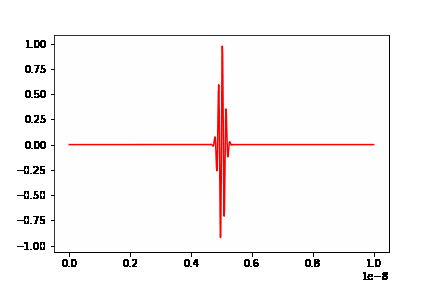

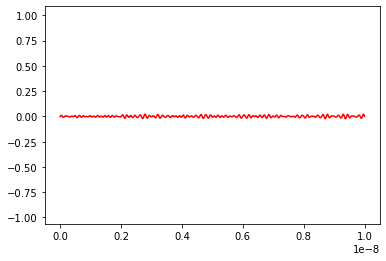

In [17]:
#matrix elements of the tridiagonal matrices A and B
a1=1+h*((1j*hbar)/(2*M*a**2))
a2=-h*((1j*hbar)/(4*M*a**2))
b1=1-h*((1j*hbar)/(2*M*a**2))
b2=h*((1j*hbar)/(4*M*a**2))

A=np.zeros([3,N+1],complex) #initializing tridiagonal matrix A needed for the banded function
A[1,:]=a1 #diagonal elements
A[0,:],A[2,:]=a2,a2 #above and below the diagonal

#initialize arrays (xgrid, vgrid)
xgrid=np.linspace(0,L,N+1) #values for x
psi=np.zeros(N+1,complex) #array for storing values of psi
for i,j in enumerate(xgrid):
    psi[i] = psi0(j)
vgrid=np.zeros(N+1,complex)
vgrid[1:N]=b1*psi[1:N]+b2*(psi[2:N+1]+psi[0:N-1])
psi=banded(A,vgrid,1,1) #solving for psi as x in Ax=v

frames = [] #initialize the frames for the animation
fig = plt.figure() #fig

for t in range(20000): #generate new vgrid and solve for psi for every time-step
    vgrid=np.zeros(N+1, complex) 
    vgrid[1:N]=b1*psi[1:N]+b2*(psi[2:N+1]+psi[0:N-1])
    psi=banded(A,vgrid,1,1)
    if t%10==0: #for smoother runs (increase to reduce run time)
        frames.append(plt.plot(xgrid,np.real(psi),color='red')) #append new frames
        
#Animation section
ITSMOOOOOOOVING = ArtistAnimation(fig , frames,interval=20,blit=True,repeat_delay=1000) 
writergif = PillowWriter(fps=60) #create writer instance using Pillow ("the friendly Python Imaging Library fork")
ITSMOOOOOOOVING.save ('module5_animation1_Taburno.gif', writer=writergif) #pass writer to a save function to save GIF
Image (filename="module5_animation1_Taburno.gif") #show GIF